In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
car_sales = pd.read_csv("Car_sales.csv")
car_sales.shape

(157, 16)

In [3]:
car_sales.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [4]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [5]:
car_sales.isnull().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [6]:
car_sales.isnull().mean()*100

Manufacturer            0.000000
Model                   0.000000
Sales_in_thousands      0.000000
__year_resale_value    22.929936
Vehicle_type            0.000000
Price_in_thousands      1.273885
Engine_size             0.636943
Horsepower              0.636943
Wheelbase               0.636943
Width                   0.636943
Length                  0.636943
Curb_weight             1.273885
Fuel_capacity           0.636943
Fuel_efficiency         1.910828
Latest_Launch           0.000000
Power_perf_factor       1.273885
dtype: float64

In [7]:
car_sales.shape

(157, 16)

In [8]:
#finds out the column in which the missing percentage is > 0 and < 5
car_sales_new = [var for var in car_sales.columns if car_sales[var].isnull().mean()  < 0.05 and car_sales[var].isnull().mean()  > 0 ]
car_sales_new

['Price_in_thousands',
 'Engine_size',
 'Horsepower',
 'Wheelbase',
 'Width',
 'Length',
 'Curb_weight',
 'Fuel_capacity',
 'Fuel_efficiency',
 'Power_perf_factor']

In [9]:
car_sales[car_sales_new].sample(5)

,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
37,20.230,2.5,168.0,108.0,71.0,186.0,3.058,16.0,24.0,67.876108
131,14.290,1.9,124.0,102.4,66.4,176.9,2.452,12.1,31.0,49.865774
31,16.480,2.0,132.0,108.0,71.0,186.0,2.911,16.0,27.0,53.566200
43,16.980,2.5,120.0,131.0,71.5,215.0,3.557,22.0,19.0,49.645002
41,21.315,3.9,175.0,109.6,78.8,192.6,4.245,32.0,15.0,71.135292


In [10]:
# It means that after dropping the missing values rows we remain with 96.8% of the original data
len(car_sales[car_sales_new].dropna())

152

In [11]:
# It drops the rows having missing values in the car_sales_new columns
new_car_sales = car_sales[car_sales_new].dropna()
car_sales.shape,new_car_sales.shape

((157, 16), (152, 10))

In [12]:
new_car_sales.head

<bound method NDFrame.head of      Price_in_thousands  Engine_size  Horsepower  Wheelbase  Width  Length  \
0                 21.50          1.8       140.0      101.2   67.3   172.4   
1                 28.40          3.2       225.0      108.1   70.3   192.9   
3                 42.00          3.5       210.0      114.6   71.4   196.6   
4                 23.99          1.8       150.0      102.6   68.2   178.0   
5                 33.95          2.8       200.0      108.7   76.1   192.0   
..                  ...          ...         ...        ...    ...     ...   
152               24.40          1.9       160.0      100.5   67.6   176.6   
153               27.50          2.4       168.0      104.9   69.3   185.9   
154               28.80          2.4       168.0      104.9   69.3   186.2   
155               45.50          2.3       236.0      104.9   71.5   185.7   
156               36.00          2.9       201.0      109.9   72.1   189.8   

     Curb_weight  Fuel_capacity  

In [13]:
new_car_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 0 to 156
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price_in_thousands  152 non-null    float64
 1   Engine_size         152 non-null    float64
 2   Horsepower          152 non-null    float64
 3   Wheelbase           152 non-null    float64
 4   Width               152 non-null    float64
 5   Length              152 non-null    float64
 6   Curb_weight         152 non-null    float64
 7   Fuel_capacity       152 non-null    float64
 8   Fuel_efficiency     152 non-null    float64
 9   Power_perf_factor   152 non-null    float64
dtypes: float64(10)
memory usage: 13.1 KB


In [14]:
car_sales['Vehicle_type'].value_counts()

Passenger    116
Car           41
Name: Vehicle_type, dtype: int64

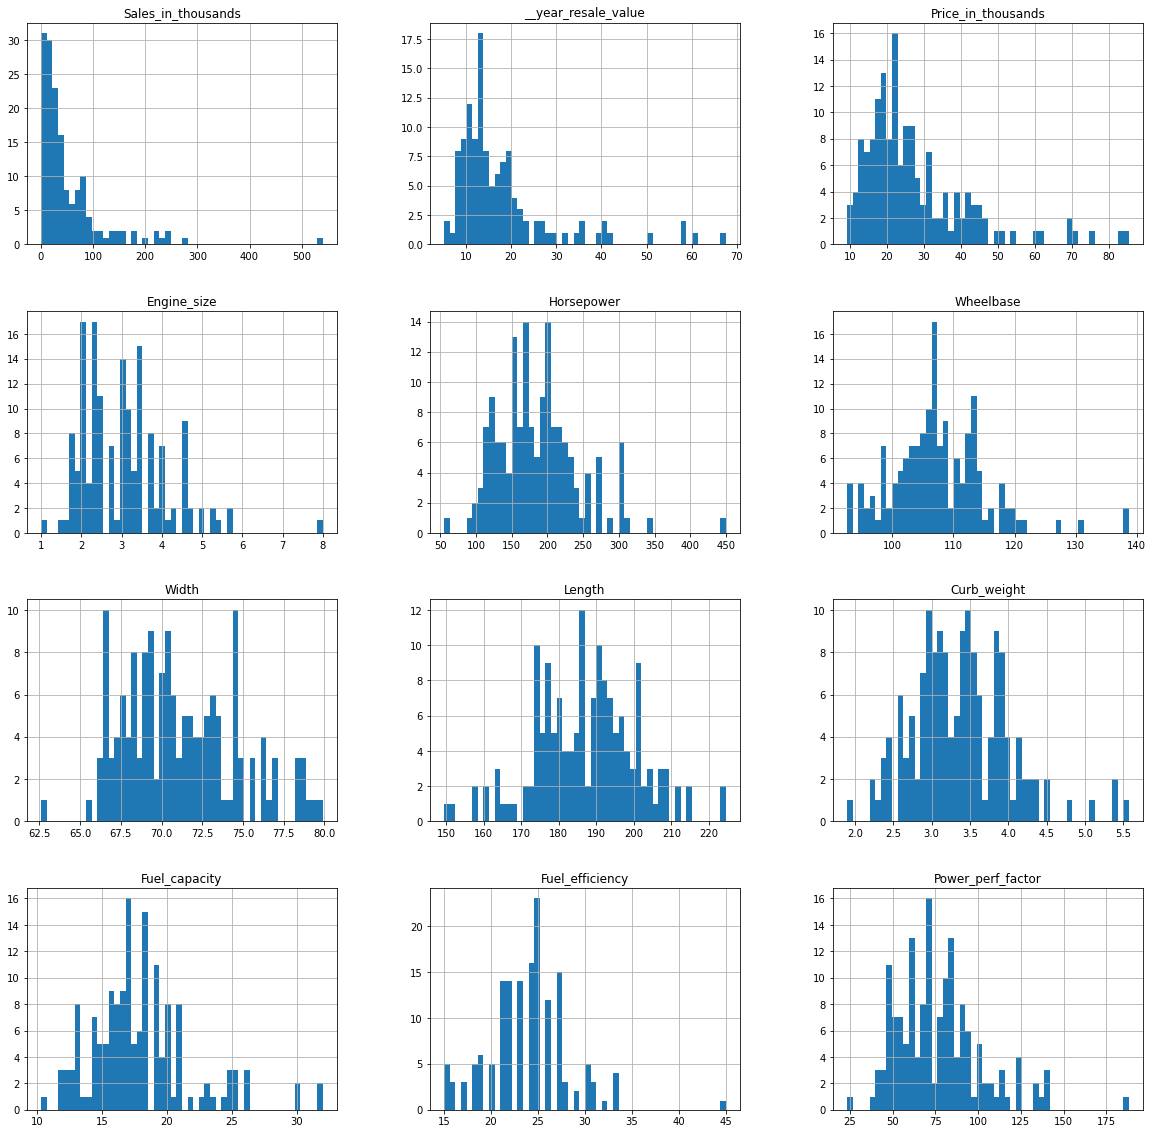

In [15]:
car_sales.hist(figsize = (20,20),bins = 50);

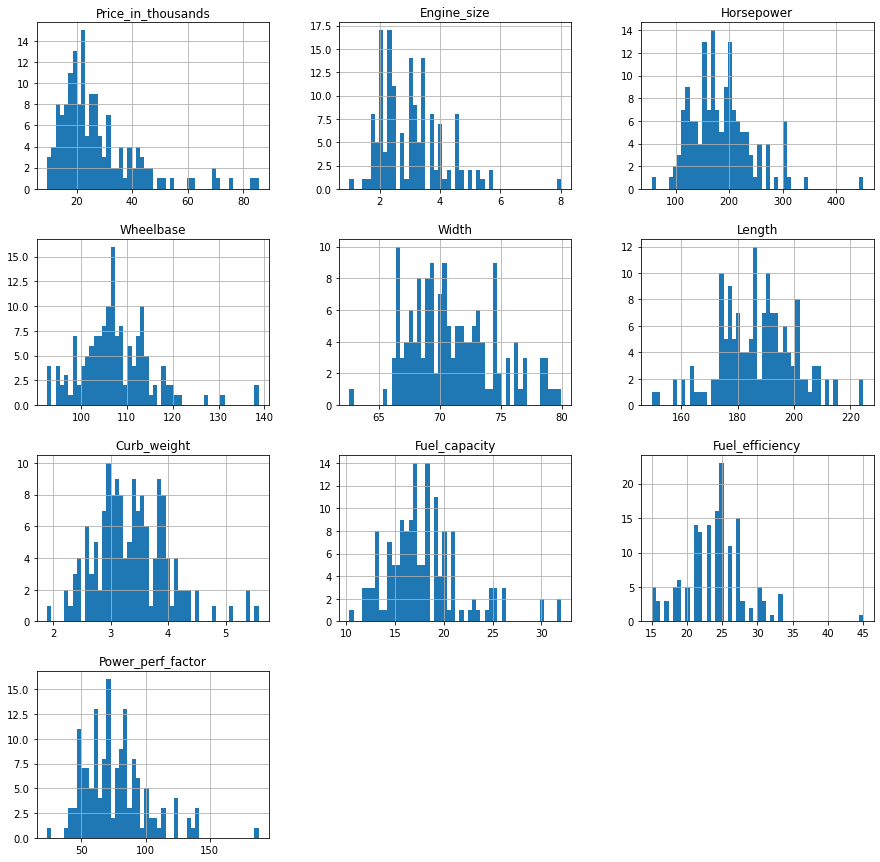

In [16]:
new_car_sales.hist(figsize = (15,15),bins = 50);

In [17]:
'''If the columns graph of car_sales and new_car_sales do not show any major difference then we can keep continuing our CCA'''

'If the columns graph of car_sales and new_car_sales do not show any major difference then we can keep continuing our CCA'

In [18]:
new_car_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 0 to 156
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price_in_thousands  152 non-null    float64
 1   Engine_size         152 non-null    float64
 2   Horsepower          152 non-null    float64
 3   Wheelbase           152 non-null    float64
 4   Width               152 non-null    float64
 5   Length              152 non-null    float64
 6   Curb_weight         152 non-null    float64
 7   Fuel_capacity       152 non-null    float64
 8   Fuel_efficiency     152 non-null    float64
 9   Power_perf_factor   152 non-null    float64
dtypes: float64(10)
memory usage: 13.1 KB


<AxesSubplot:>

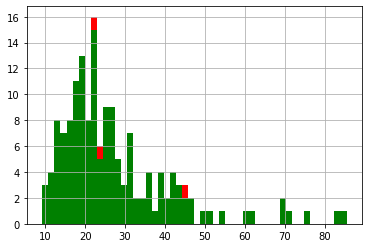

In [19]:
fig = plt.plot(figsize = (8,8))
car_sales["Price_in_thousands"].hist(bins = 50 , color = 'red')
new_car_sales["Price_in_thousands"].hist(bins = 50,color = 'green')

<AxesSubplot:>

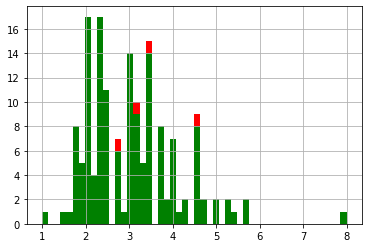

In [20]:
fig = plt.plot(figsize = (8,8))
car_sales["Engine_size"].hist(bins = 50 , color = 'red')
new_car_sales["Engine_size"].hist(bins = 50,color = 'green')

<AxesSubplot:>

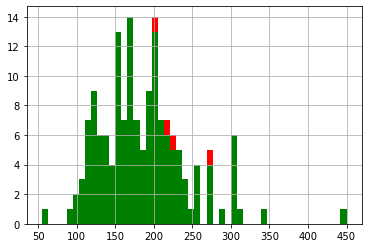

In [21]:
fig = plt.plot(figsize = (8,8))
car_sales["Horsepower"].hist(bins = 50 , color = 'red')
new_car_sales["Horsepower"].hist(bins = 50,color = 'green')

<AxesSubplot:>

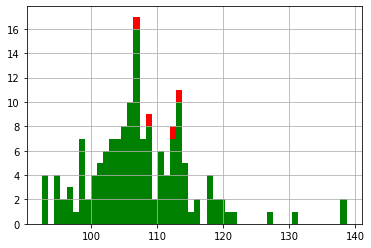

In [22]:
fig = plt.plot(figsize = (8,8))
car_sales["Wheelbase"].hist(bins = 50 , color = 'red')
new_car_sales["Wheelbase"].hist(bins = 50,color = 'green')

<AxesSubplot:>

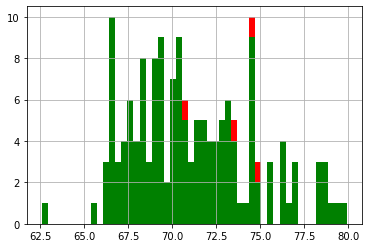

In [23]:
fig = plt.plot(figsize = (8,8))
car_sales["Width"].hist(bins = 50 , color = 'red')
new_car_sales["Width"].hist(bins = 50,color = 'green')

<AxesSubplot:>

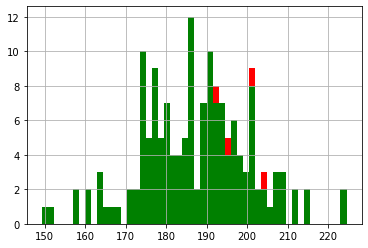

In [24]:
fig = plt.plot(figsize = (8,8))
car_sales["Length"].hist(bins = 50 , color = 'red')
new_car_sales["Length"].hist(bins = 50,color = 'green')

<AxesSubplot:>

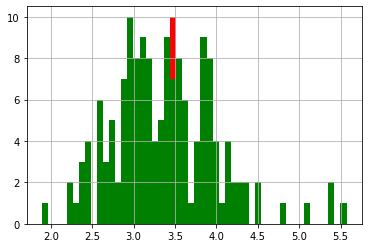

In [25]:
fig = plt.plot(figsize = (8,8))
car_sales["Curb_weight"].hist(bins = 50 , color = 'red')
new_car_sales["Curb_weight"].hist(bins = 50,color = 'green')

<AxesSubplot:>

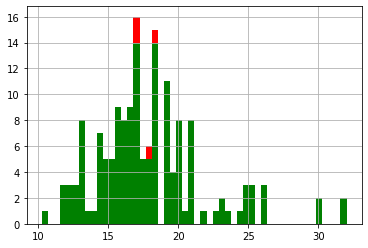

In [26]:
fig = plt.plot(figsize = (8,8))
car_sales["Fuel_capacity"].hist(bins = 50 , color = 'red')
new_car_sales["Fuel_capacity"].hist(bins = 50,color = 'green')

<AxesSubplot:>

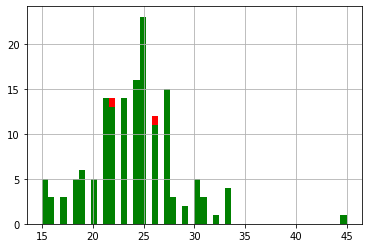

In [27]:
fig = plt.plot(figsize = (8,8))
car_sales["Fuel_efficiency"].hist(bins = 50 , color = 'red')
new_car_sales["Fuel_efficiency"].hist(bins = 50,color = 'green')

<AxesSubplot:>

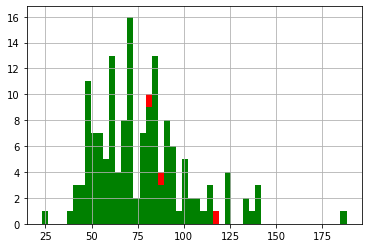

In [28]:
fig = plt.plot(figsize = (8,8))
car_sales["Power_perf_factor"].hist(bins = 50 , color = 'red')
new_car_sales["Power_perf_factor"].hist(bins = 50,color = 'green')

In [29]:
'''So their is no to very minor change in the data so we can proceed with the CCA step'''

'So their is no to very minor change in the data so we can proceed with the CCA step'

In [30]:
new_car_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 0 to 156
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price_in_thousands  152 non-null    float64
 1   Engine_size         152 non-null    float64
 2   Horsepower          152 non-null    float64
 3   Wheelbase           152 non-null    float64
 4   Width               152 non-null    float64
 5   Length              152 non-null    float64
 6   Curb_weight         152 non-null    float64
 7   Fuel_capacity       152 non-null    float64
 8   Fuel_efficiency     152 non-null    float64
 9   Power_perf_factor   152 non-null    float64
dtypes: float64(10)
memory usage: 13.1 KB


In [31]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [32]:
car_sales.sample(10)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
97,Mercedes-B,SLK230,1.526,NaN,Passenger,41.000,2.3,185.0,94.5,67.5,157.3,2.975,14.0,27.0,8/6/2011,81.848969
67,Jeep,Wrangler,55.557,13.475,Car,14.460,2.5,120.0,93.4,66.7,152.0,3.045,19.0,17.0,3/4/2012,48.672898
21,Chevrolet,Lumina,24.629,10.310,Passenger,18.890,3.1,175.0,107.5,72.5,200.9,3.330,16.6,25.0,5/24/2011,69.991396
145,Volkswagen,Golf,9.761,11.425,Passenger,14.900,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0,1/24/2011,46.943877
129,Saturn,SL,80.620,9.200,Passenger,10.685,1.9,100.0,102.4,66.4,176.9,2.332,12.1,33.0,8/16/2012,39.986425
82,Mitsubishi,Diamante,5.711,16.575,Passenger,24.997,3.5,210.0,107.1,70.3,194.1,3.443,19.0,22.0,8/28/2012,84.830779
23,Chevrolet,Camaro,26.402,13.025,Passenger,24.340,3.8,200.0,101.1,74.1,193.2,3.500,16.8,25.0,10/23/2011,81.118543
143,Toyota,4Runner,68.411,19.425,Car,22.288,2.7,150.0,105.3,66.5,183.3,3.440,18.5,23.0,3/7/2011,62.355577
79,Mitsubishi,Mirage,26.232,8.325,Passenger,13.987,1.8,113.0,98.4,66.5,173.6,2.250,13.2,30.0,4/23/2012,45.832181
71,Lexus,GS300,12.698,32.075,Passenger,37.805,3.0,225.0,110.2,70.9,189.2,3.638,19.8,23.0,5/10/2012,94.946698


In [33]:
car_sales['Vehicle_type'].value_counts()

Passenger    116
Car           41
Name: Vehicle_type, dtype: int64

In [34]:
car_sales.shape

(157, 16)

In [35]:
car_sales['__year_resale_value'].isnull().value_counts()

False    121
True      36
Name: __year_resale_value, dtype: int64

<AxesSubplot:>

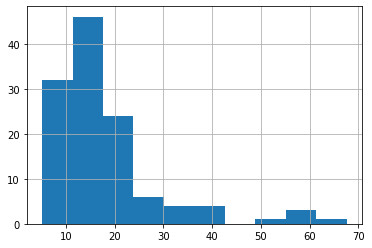

In [36]:
car_sales['__year_resale_value'].hist()

<AxesSubplot:ylabel='Density'>

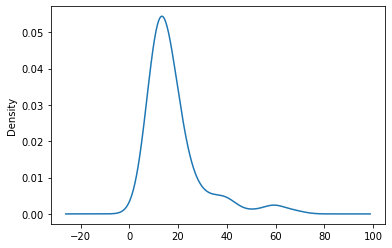

In [37]:
car_sales['__year_resale_value'].plot(kind = 'kde')

In [38]:
var = car_sales['__year_resale_value'].var()
var

131.18000732438017

In [39]:
new_car_sales.head()

,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
3,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639
5,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105


In [40]:
car_sales.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [41]:
 car_sales['__year_resale_value'].fillna(car_sales['__year_resale_value'].mean(),inplace = True)

In [42]:
 car_sales['__year_resale_value'].isnull().sum()

0

In [43]:
var2 = car_sales['__year_resale_value'].var()
var2

100.90769794183092

In [44]:
 car_sales['__year_resale_value'].fillna(car_sales['__year_resale_value'].median(),inplace = True)

In [45]:
var3 = car_sales['__year_resale_value'].var()
var3

100.90769794183092

In [46]:
car_sales['Sales_in_thousands'].isnull().sum()

0

In [47]:
new_car_sales['Sales_in_thousands'] = car_sales['Sales_in_thousands']

In [48]:
new_car_sales

,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Sales_in_thousands
0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,16.919
1,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,39.384
3,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,8.588
4,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,20.397
5,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105,18.780
...,...,...,...,...,...,...,...,...,...,...,...
152,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,66.498812,3.545
153,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,70.654495,15.245
154,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,71.155978,17.531
155,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,101.623357,3.493


In [49]:
new_car_sales['__year_resale_value'] = car_sales['__year_resale_value']

In [50]:
new_car_sales.head()

,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Sales_in_thousands,__year_resale_value
0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,16.919,16.360
1,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,39.384,19.875
3,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,8.588,29.725
4,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,20.397,22.255
5,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105,18.780,23.555


In [51]:
new_car_sales.isnull().sum()

Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Power_perf_factor      0
Sales_in_thousands     0
__year_resale_value    0
dtype: int64

In [52]:
X = new_car_sales.drop(columns = ['Price_in_thousands'])
y = new_car_sales['Price_in_thousands']
X,y

(     Engine_size  Horsepower  Wheelbase  Width  Length  Curb_weight  \
 0            1.8       140.0      101.2   67.3   172.4        2.639   
 1            3.2       225.0      108.1   70.3   192.9        3.517   
 3            3.5       210.0      114.6   71.4   196.6        3.850   
 4            1.8       150.0      102.6   68.2   178.0        2.998   
 5            2.8       200.0      108.7   76.1   192.0        3.561   
 ..           ...         ...        ...    ...     ...          ...   
 152          1.9       160.0      100.5   67.6   176.6        3.042   
 153          2.4       168.0      104.9   69.3   185.9        3.208   
 154          2.4       168.0      104.9   69.3   186.2        3.259   
 155          2.3       236.0      104.9   71.5   185.7        3.601   
 156          2.9       201.0      109.9   72.1   189.8        3.600   
 
      Fuel_capacity  Fuel_efficiency  Power_perf_factor  Sales_in_thousands  \
 0             13.2             28.0          58.280150

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.2,random_state = 2)

In [54]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [55]:
lr.fit(X_train,y_train)

LinearRegression()

In [56]:
y_pred = lr.predict(X_test)

In [57]:
y_pred

array([22.60499998, 18.84999998, 23.98999999, 22.69499998, 26.98999998,
       27.88499999, 22.288     , 18.26999997, 13.96000001, 18.88999998,
       16.48000001, 26.89499997, 34.60499997, 13.49900002, 20.09499999,
       62.00000005, 12.07000002, 12.88500001, 12.53500001, 31.92999999,
       69.72499989, 35.29999998, 19.56499999,  9.23500002, 22.527     ,
       12.64      , 15.00999998, 27.55999999, 41.99999999, 21.61999998,
       17.885     , 24.997     , 19.98999999, 13.10800001, 25.63499999,
       49.89999995, 39.66500003, 17.03500001, 38.89999999, 17.51799999,
       71.02000003, 25.34499999, 42.65999992, 15.89999998, 19.03500002,
       31.96499999, 15.34999999, 22.24499999, 23.75499999, 21.49999999,
       24.49500002, 19.45999997, 16.87499998, 20.39      , 25.54499997,
       19.39      , 21.20000001, 14.29      , 36.22900001, 82.59999998,
       39.89499987, 28.34000005, 22.36799996, 26.39899998, 11.79900001,
       16.888     , 17.35700001, 45.49999991, 24.33999999, 20.54

In [58]:
new_car_sales

,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Sales_in_thousands,__year_resale_value
0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,16.919,16.360000
1,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,39.384,19.875000
3,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,8.588,29.725000
4,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,20.397,22.255000
5,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105,18.780,23.555000
...,...,...,...,...,...,...,...,...,...,...,...,...
152,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,66.498812,3.545,18.072975
153,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,70.654495,15.245,18.072975
154,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,71.155978,17.531,18.072975
155,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,101.623357,3.493,18.072975


In [61]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
     
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2 Score",r2_score(y_test,y_pred))

MAE 1.9868122083791463e-08
MSE 8.894125869240895e-16
R2 Score 1.0


In [62]:
lr.coef_

array([-6.75424340e-01, -9.16891269e-01, -3.35175734e-10, -1.23832893e-09,
        8.08483051e-10, -2.41810513e-08,  5.32942378e-10, -2.20922014e-09,
        2.59231561e+00, -5.16586357e-11, -2.78098807e-09])

In [63]:
lr.intercept_

1.515645244865027e-07